В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

=======================================================
Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Выбрали гамма-распределение https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [81]:
gamma_rv = sts.gamma(a=1.99, loc=0.00, scale=1.00)
sample = gamma_rv.rvs(1000) #генерируем выборку 1000 элементов

0 1.393427817519595 1.9390178913032712


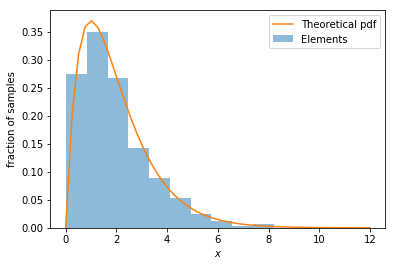

In [82]:
#строим гистограмму выборки
plt.hist(sample, bins=10, density=True, histtype='stepfilled', alpha=0.5, label='Elements')

#рисуем поверх неё теоретическую плотность распределения. 48 шагов
x = np.linspace(0,12,48)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf', alpha=1.0)
plt.legend()


plt.ylabel('fraction of samples')
plt.xlabel('$x$')

median = 0
std = 0
mean = 0
# median = sample.median()
std = sample.std()
mean = sample.mean()

print median, std, mean

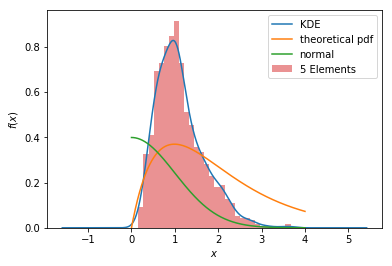

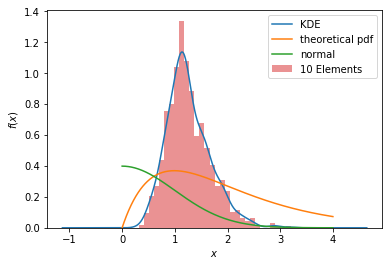

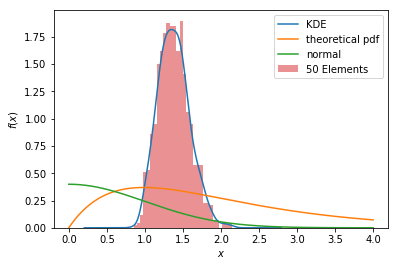

In [161]:
def getStds(n):
    values = sts.gamma(a=1.99, loc=0.00, scale=1.00).rvs(n)    
    return values.std()

def drawDiagram(n):
    # получаем 1000 средних
    stds = np.array([])
    for i in np.arange(0, 1000):
        stds = np.append(stds, getStds(n))
        
    # рисуем график
    df = pd.DataFrame(stds, columns=['KDE']) #плотность соответствующего нормального распределения
    ax = df.plot(kind='density')
    
    x = np.linspace(0,4,1000)
    pdf = gamma_rv.pdf(x) # теоритическая плотность соответствующего распределения
    plt.plot(x, pdf, label='theoretical pdf', alpha=1.0)
    
    norm_rv = sts.norm(loc=0.00, scale=1.00)
    norm_rv.rvs(size=1000)
    x = np.linspace(0,4,1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='normal')
    
    plt.hist(stds, bins=30, density=True, histtype='stepfilled', alpha=0.5, label='%d Elements' % n) #гистограмма средних
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    


drawDiagram(5)
drawDiagram(10)
drawDiagram(50)



Text(0.5,0,'$x$')

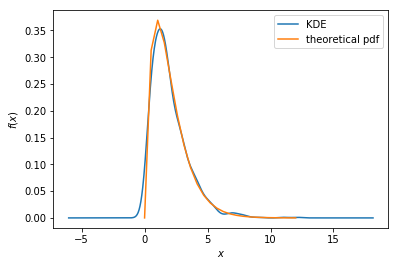

In [26]:
#на том же графике строим теорию
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,12,24)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1.0)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [ ]:
median = gamma_rv.median()
std = gamma_rv.std()
mean = gamma_rv.mean()

print median, std, mean

# print sample

x = np.linspace(0,10,1000)
cdf = gamma_rv.cdf(x)
plt.step(x, cdf, label='theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Text(0.5,0,'$x$')

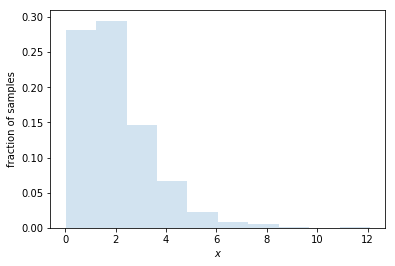

Text(0.5,0,'$x$')

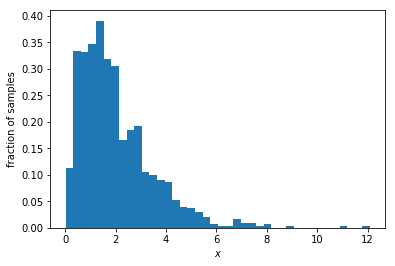

In [4]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

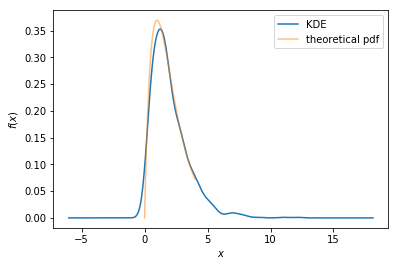

In [5]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,4,100)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')